### **Bag of n_grams: Exercise**

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [1]:
#import pandas library
import pandas as pd
#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv('Fake_Real_Data.csv')
#print the shape of dataframe
print(df.shape)
#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
#check the distribution of labels 
df.label.value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [4]:
#Add the new column "label_num" which gives a unique number to each of these labels 
df['label_num'] = df['label'].apply(lambda x : 0 if x == "Fake" else 1)
#check the results with top 5 rows
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


### **Modelling without Pre-processing Text data**

In [5]:
#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.15, 
    random_state=2022,
    stratify=df.label_num
)


In [6]:
#print the shapes of X_train and X_test
X_train.shape, X_test.shape

((8415,), (1485,))

**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
first_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 3))),
     ('knn', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))
])

#2. fit with X_train and y_train
first_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = first_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.48      0.64       750
           1       0.65      0.98      0.78       735

    accuracy                           0.73      1485
   macro avg       0.80      0.73      0.71      1485
weighted avg       0.81      0.73      0.71      1485



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from  sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
second_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 3))),
     ('knn', (KNeighborsClassifier(n_neighbors=10, metric = 'cosine'))) 
])

#2. fit with X_train and y_train
second_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = second_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.56      0.71       750
           1       0.69      1.00      0.81       735

    accuracy                           0.78      1485
   macro avg       0.84      0.78      0.76      1485
weighted avg       0.84      0.78      0.76      1485




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
third_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 3))),
     ('knn', (RandomForestClassifier())) 
])

#2. fit with X_train and y_train
third_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = third_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1485
   macro avg       1.00      1.00      1.00      1485
weighted avg       1.00      1.00      1.00      1485




**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


In [11]:
from sklearn.naive_bayes import MultinomialNB

#1. create a pipeline object
fourth_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 3))),
     ('knn', (MultinomialNB(alpha=0.75))) 
])

#2. fit with X_train and y_train
fourth_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = fourth_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       750
           1       0.99      0.99      0.99       735

    accuracy                           0.99      1485
   macro avg       0.99      0.99      0.99      1485
weighted avg       0.99      0.99      0.99      1485



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [12]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [13]:
# create a new column "preprocessed_txt" and use the utility function above to get the clean data
# this will take some time, please be patient
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [14]:
#print the top 5 rows
df.head()

,Text,label,label_num,preprocessed_txt
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump surrogate BRUTALLY Stabs Pathetic VIDE...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


**Build a model with pre processed text**

In [15]:
#Do the 'train-test' splitting with test size of 15% with random state of 2022 and stratify sampling too
#Note: Make sure to use only the "preprocessed_txt" column for splitting
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.15,
    random_state=2022,
    stratify=df.label_num
)

**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [18]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
third_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (3, 3))),
     ('knn', (RandomForestClassifier())) 
])

#2. fit with X_train and y_train
third_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = third_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       750
           1       0.99      0.94      0.96       735

    accuracy                           0.96      1485
   macro avg       0.96      0.96      0.96      1485
weighted avg       0.96      0.96      0.96      1485



**Attempt2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, Bigram, and trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [19]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
third_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 3))),
     ('knn', (RandomForestClassifier())) 
])

#2. fit with X_train and y_train
third_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = third_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       750
           1       1.00      0.99      1.00       735

    accuracy                           1.00      1485
   macro avg       1.00      1.00      1.00      1485
weighted avg       1.00      1.00      1.00      1485



Text(95.72222222222221, 0.5, 'Truth')

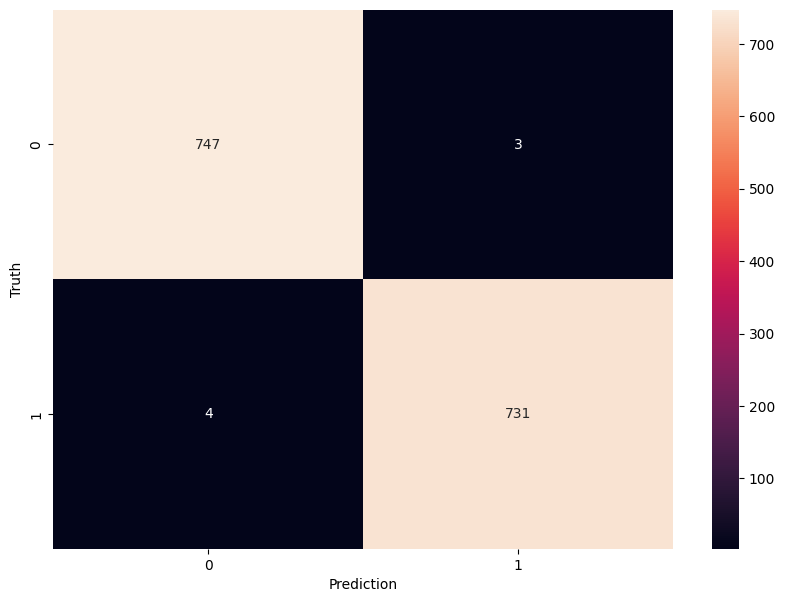

In [21]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Without preprocess data RandomForestClassifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier


#import train-test-split from sklearn 
from sklearn.model_selection import train_test_split

#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.15, 
    random_state=2022,
    stratify=df.label_num
)

#1. create a pipeline object
third_clf = Pipeline([
    ('bow', CountVectorizer(ngram_range = (1, 3))),
     ('knn', (RandomForestClassifier())) 
])

#2. fit with X_train and y_train
third_clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = third_clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1485
   macro avg       1.00      1.00      1.00      1485
weighted avg       1.00      1.00      1.00      1485



Text(95.72222222222221, 0.5, 'Truth')

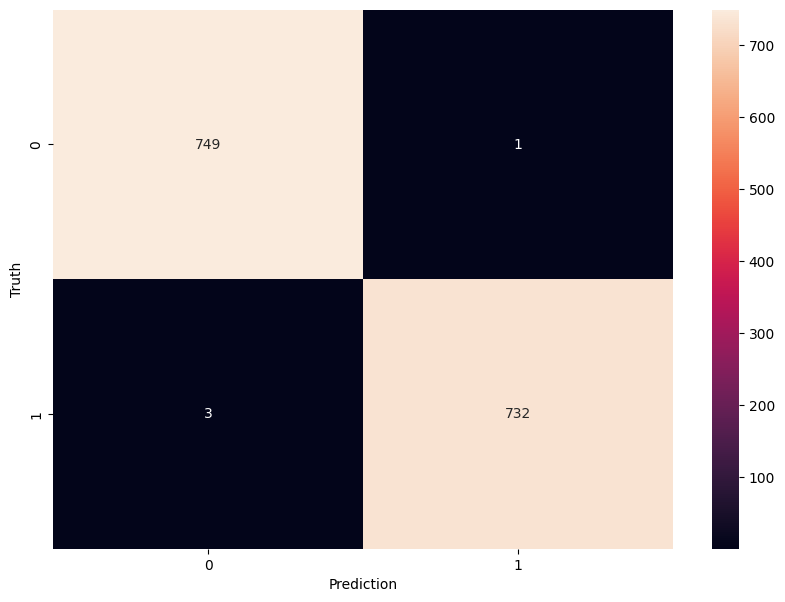

In [23]:
#finally print the confusion matrix for the best model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')